# Installation

- `pip install -r requirements.txt`

# Libraries

In [13]:
import numpy as np  # For computing data
import pandas as pd  # Handle and view data in tabular format which is crucial for notebook dev, cleaning data, export data tables into .CSV files.
import pandas_ta as ta # calculate and add technical indicators with the stock price data, which  will be used for your strategies and visualizations.
import matplotlib.pyplot as plt # used for creating static strategy performance(s) graph
import matplotlib.dates as mdates # format the dates for the matplotlib graphs to be more readable
import yfinance as yf # the finance API data source module

import sys # Just to handle file path-ing
import os # Just to handle file path-ing in this notebook and to use environment variables in the flask app.

# Add the path to the folder containing utils.py
sys.path.append(os.path.abspath('../app/helpers'))

import importlib # Ensure that we don't need to restart the kernel in notebook env, everytime we make a change to metric_utils file
import metric_utils # Custom module in .helpers dir,  calculating various metrics related to your stock analysis, trading strategies, or performance evaluation.
importlib.reload(metric_utils)

<module 'metric_utils' from 'c:\\Users\\whjw1\\Documents\\GitHub\\PythonProjectsDirectory\\StockmarketTechnicalAnalyzer\\app\\helpers\\metric_utils.py'>

# Data Retrieval

Possible user inputs are:

- `tickers`
- `start_date`
- `end_date`

[What are the stock sectors?](https://www.schwab.com/learn/story/what-are-stock-sectors)

| Ticker | Company | Sector |
|:---|:---| :---|
| KO | Coca-Cola | Consumer Staples |
| PEP | Pepsi | Consumer Staples |
| WMT | Walmart | Consumer Staples |
| SBUX | Starbucks | Consumer Discretionary |
| MCD | McDonald's | Consumer Discretionary |
| AAL | American Airlines | Industrials |
| DAL | Delta Airlines | Industrials |
| F | Ford Motors | Industrials |
| VZ | Verizon | Communication Services |
| T | AT&T | Communication Services |
| DIS | Disney | Communication Services |
| BAC | Bank of America | Financials |
| JPM | JP Morgan | Financials |
| MA | Mastercard | Financials |
| V | Visa | Financials |
| ORCL | Oracle | Information Technology |
| AMD | AMD | Information Technology |
| NVDA | Nvidia | Information Technology |
| AAPL | Apple | Information Technology |
| MSFT | Microsoft | Information Technology |

In [14]:
# user to decide this parameters
TICKERS = [
    'KO','PEP','WMT', # consumer staples
    'SBUX','MCD', # consumer discretionary
    'AAL','DAL','F', # industrials
    'VZ', 'T', 'DIS', # communication services
    'BAC','JPM','MA','V', # financials
    'ORCL','AMD','NVDA','AAPL','MSFT', # information technology
] 
START_DATE = "2000-01-01"
END_DATE = "2024-07-31"

Documentation: [yfinance](https://github.com/ranaroussi/yfinance/wiki/Tickers#parameters)

In [15]:
df = yf.download(tickers=TICKERS, interval="1d", start=START_DATE, end=END_DATE, auto_adjust=True, group_by='ticker')
df.head() # see how the raw data format looks

[*********************100%***********************]  20 of 20 completed


Ticker                           MCD                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2000-01-03 00:00:00+00:00  21.832521  21.900855  21.285854  21.661688   
2000-01-04 00:00:00+00:00  21.490851  21.627518  20.978351  21.217518   
2000-01-05 00:00:00+00:00  21.217520  22.071687  21.217520  21.559187   
2000-01-06 00:00:00+00:00  21.388347  21.525014  21.149180  21.251680   
2000-01-07 00:00:00+00:00  21.320023  21.866690  21.251690  21.798357   

Ticker                                   ORCL                        \
Price                       Volume       Open       High        Low   
Date                                                                  
2000-01-03 00:00:00+00:00  4520600  25.224924  25.338777  22.593638   
2000-01-04 00:00:00+00:00  4216500  23.377965  24.010486  21.252695   
2000-01-05 00:00:00+00:00  5231600  20.569575  21.531006  19.431037   
2000-01-06 00:00:00+00:00  4809400  20.272287  21.252694  19.165375   
2000-01-07 00:00:00+00:00  5124700  19.228627  20.949083  18.937668   

Ticker                                           ...         VZ             \
Price                          Close     Volume  ...       Open       High   
Date                                             ...                         
2000-01-03 00:00:00+00:00  23.909281   98114800  ...  16.839908  17.117679   
2000-01-04 00:00:00+00:00  21.796663  116824800  ...  16.579503  16.787831   
2000-01-05 00:00:00+00:00  20.645477  166054000  ...  16.388529  16.891989   
2000-01-06 00:00:00+00:00  19.431034  109880000  ...  16.686691  16.686691   
2000-01-07 00:00:00+00:00  20.923782   91755600  ...  16.459538  16.511956   

Ticker                                                           KO  \
Price                            Low      Close   Volume       Open   
Date                                                                  
2000-01-03 00:00:00+00:00  16.562136  16.648939  4663843  14.530039   
2000-01-04 00:00:00+00:00  15.902435  16.110764  5005878  14.122949   
2000-01-05 00:00:00+00:00  16.249643  16.648939  6368681  14.138606   
2000-01-06 00:00:00+00:00  16.319759  16.564381  4705763  14.263868   
2000-01-07 00:00:00+00:00  16.162497  16.442064  5043907  14.498722   

Ticker                                                                
Price                           High        Low      Close    Volume  
Date                                                                  
2000-01-03 00:00:00+00:00  14.530039  13.841115  14.122948  10997000  
2000-01-04 00:00:00+00:00  14.232550  13.935060  14.138606   7308000  
2000-01-05 00:00:00+00:00  14.389123  14.044661  14.263865   9457400  
2000-01-06 00:00:00+00:00  14.451757  14.169924  14.279526   7129200  
2000-01-07 00:00:00+00:00  15.218961  14.498722  15.218961  11474000  

[5 rows x 100 columns]

In [16]:
# reformat for easy read from store
df = df.stack(level='Ticker')
df.columns = [s.lower() for s in df.columns]
df.index.names = [s.lower() for s in df.index.names]
df.reset_index(inplace=True)
df.head()

C:\Users\whjw1\AppData\Local\Temp\ipykernel_22216\4229889244.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack(level='Ticker')


,date,ticker,open,high,low,close,volume
0,2000-01-03 00:00:00+00:00,AAPL,0.790753,0.848245,0.766719,0.844004,535796800.0
1,2000-01-03 00:00:00+00:00,AMD,14.968750,15.593750,14.687500,15.500000,7843200.0
2,2000-01-03 00:00:00+00:00,BAC,13.263146,13.263146,12.669274,12.784749,13705800.0
3,2000-01-03 00:00:00+00:00,DIS,22.454557,22.982335,22.070719,22.934355,8402230.0
4,2000-01-03 00:00:00+00:00,F,12.593085,12.697530,12.443878,12.503561,4056814.0


In [17]:
# Download the benchmark data for reference later
spy = yf.download(tickers='SPY', interval="1d", start=START_DATE, end=END_DATE, auto_adjust=True)
spy.reset_index(inplace=True)
spy.columns = [c.lower() for c in spy.columns]
if not spy.isnull().sum().any():
    spy.to_csv('../app/static/data/spy.csv', index=False)
    print("Saved to data/spy.csv")

[*********************100%***********************]  1 of 1 completed

Saved to data/spy.csv


In [18]:
spy = pd.read_csv('../app/static/data/spy.csv', parse_dates=['date'])
spy.set_index('date', inplace=True)
spy

,open,high,low,close,volume
date,,,,,
2000-01-03,94.803469,94.803469,92.005728,93.004921,8164300
2000-01-04,91.785883,92.125609,89.297892,89.367836,8089800
2000-01-05,89.487719,90.506896,87.769108,89.527687,12177900
2000-01-06,89.287899,90.486931,88.088867,88.088867,6227200
2000-01-07,89.727535,93.204727,89.567664,93.204727,8066500
...,...,...,...,...,...
2024-07-24,547.181624,547.490674,538.637823,539.574951,74515300
2024-07-25,539.694562,545.785924,535.806524,536.763550,61158300
2024-07-26,540.621778,545.516737,539.834155,542.775146,53763800


In [19]:
# just a performance statistic of buying and holding the S&P 500 for the entire period
# we will compare it to the strategy performance later in the flask app
metric_utils.benchmark_performance(spy, START_DATE, END_DATE)

======================= BENCHMARK BUY-N-HOLD PERFORMANCE =======================
Trading Days: 6181
'Up' days: 3357 (54.31%)
'Down' days: 2803 (45.35%)
Total Return: 480.98%
Annualised Volatility: 19.47%
Maximum Drawdown: -55.19%
Profit Factor: 1.073
Average Profit: 0.008
Average Loss: 0.009
Benchmark performance dict = {'trade_days': '6181', 'up_days': '3357', 'up_days_percentage': '54.31', 'down_days': '2803', 'down_days_percentage': '45.35', 'total_return': '480.98', 'annualised_volatility': '19.47', 'maximum_drawdown': '-55.19', 'profit_factor': '1.073', 'average_profit': '0.008', 'average_loss_display': '0.009'}


{'trade_days': '6181',
 'up_days': '3357',
 'up_days_percentage': '54.31',
 'down_days': '2803',
 'down_days_percentage': '45.35',
 'total_return': '480.98',
 'annualised_volatility': '19.47',
 'maximum_drawdown': '-55.19',
 'profit_factor': '1.073',
 'average_profit': '0.008',
 'average_loss_display': '0.009'}

# Data Cleaning

Check for any missing values before storing for further processing.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116687 entries, 0 to 116686
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   date    116687 non-null  datetime64[ns, UTC]
 1   ticker  116687 non-null  object             
 2   open    116687 non-null  float64            
 3   high    116687 non-null  float64            
 4   low     116687 non-null  float64            
 5   close   116687 non-null  float64            
 6   volume  116687 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(1)
memory usage: 6.2+ MB


In [21]:
df.isnull().sum()

date      0
ticker    0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

No missing values to fill. Market holidays have been automatically excluded.

# Data Store

In [22]:
# format is just a csv file with column names above
df.to_csv('../app/static/data/ohlcv.csv', index=False)

# Data Processing

Construct the indicators' values for each stock.

In [23]:
# load the data into proper format for processing
df = pd.read_csv('../app/static/data/ohlcv.csv', parse_dates=['date'])
df.set_index(['date', 'ticker'], inplace=True)
df.head()

open       high        low      close  \
date                      ticker                                               
2000-01-03 00:00:00+00:00 AAPL     0.790753   0.848245   0.766719   0.844004   
                          AMD     14.968750  15.593750  14.687500  15.500000   
                          BAC     13.263146  13.263146  12.669274  12.784749   
                          DIS     22.454557  22.982335  22.070719  22.934355   
                          F       12.593085  12.697530  12.443878  12.503561   

                                       volume  
date                      ticker               
2000-01-03 00:00:00+00:00 AAPL    535796800.0  
                          AMD       7843200.0  
                          BAC      13705800.0  
                          DIS       8402230.0  
                          F         4056814.0

Documentation: [pandas-ta](https://twopirllc.github.io/pandas-ta/)

In [24]:
def contruct_indicators(group):

    # indicator: Simple Moving Averages
    group['sma_5'] = ta.sma(group['close'], length=5)
    group['sma_10'] = ta.sma(group['close'], length=10)
    group['sma_21'] = ta.sma(group['close'], length=21)
    group['sma_50'] = ta.sma(group['close'], length=50)
    group['sma_100'] = ta.sma(group['close'], length=100)
    group['sma_200'] = ta.sma(group['close'], length=200)

    # indicator: Exponential Moving Averages
    group['ema_5'] = ta.ema(group['close'], length=5)
    group['ema_10'] = ta.ema(group['close'], length=10)
    group['ema_21'] = ta.ema(group['close'], length=21)
    group['ema_50'] = ta.ema(group['close'], length=50)
    group['ema_100'] = ta.ema(group['close'], length=100)
    group['ema_200'] = ta.ema(group['close'], length=200)

    # indicator: normalized volume
    group['norm_volume_3'] = group['volume'] / group['volume'].rolling(3).median()
    group['norm_volume_5'] = group['volume'] / group['volume'].rolling(5).median()
    group['norm_volume_10'] = group['volume'] / group['volume'].rolling(10).median()
    group['norm_volume_21'] = group['volume'] / group['volume'].rolling(21).median()
    group['norm_volume_50'] = group['volume'] / group['volume'].rolling(50).median()

    # indicator: Relative Strength Index
    group['rsi_7'] = ta.rsi(group['close'], length=7)
    group['rsi_9'] = ta.rsi(group['close'], length=9)
    group['rsi_10'] = ta.rsi(group['close'], length=10)
    group['rsi_14'] = ta.rsi(group['close'], length=14)
    

    # indicator: Average Directional Index
    adx_result = ta.adx(group['high'], group['low'], group['close'], length=3)
    group['adx_3'] = adx_result['ADX_3']
    group['+DI_3'] = adx_result['DMP_3']  # +DI
    group['-DI_3'] = adx_result['DMN_3']  # -DI

    adx_result = ta.adx(group['high'], group['low'], group['close'], length=5)
    group['adx_5'] = adx_result['ADX_5']
    group['+DI_5'] = adx_result['DMP_5']  # +DI
    group['-DI_5'] = adx_result['DMN_5']  # -DI

    adx_result = ta.adx(group['high'], group['low'], group['close'], length=7)
    group['adx_7'] = adx_result['ADX_7']
    group['+DI_7'] = adx_result['DMP_7']  # +DI
    group['-DI_7'] = adx_result['DMN_7']  # -DI

    adx_result = ta.adx(group['high'], group['low'], group['close'], length=14)
    group['adx_14'] = adx_result['ADX_14']
    group['+DI_14'] = adx_result['DMP_14']  # +DI
    group['-DI_14'] = adx_result['DMN_14']  # -DI

    # indicator: Bollinger Bands
    bband_result = ta.bbands(group['close'])
    group['bb_5_lb'] = bband_result['BBL_5_2.0']
    group['bb_5_mb'] = bband_result['BBM_5_2.0']
    group['bb_5_ub'] = bband_result['BBU_5_2.0']
    group['bb_5_bw'] = bband_result['BBB_5_2.0']
    group['bb_5_p'] = bband_result['BBP_5_2.0']

    return group

def log_returns(group, periods=[1]):
    # daily log return
    group['log_return'] = np.log(group['close']) -  np.log(group['close'].shift(1))
    return group

In [25]:
df_returns = df.groupby('ticker', group_keys=False).apply(log_returns)
df_indicators = df_returns.groupby('ticker', group_keys=False).apply(contruct_indicators)
df_indicators

open        high         low  \
date                      ticker                                       
2000-01-03 00:00:00+00:00 AAPL      0.790753    0.848245    0.766719   
                          AMD      14.968750   15.593750   14.687500   
                          BAC      13.263146   13.263146   12.669274   
                          DIS      22.454557   22.982335   22.070719   
                          F        12.593085   12.697530   12.443878   
...                                      ...         ...         ...   
2024-07-30 00:00:00+00:00 SBUX     74.797930   75.593127   74.400332   
                          T        18.709777   18.788762   18.601170   
                          V       262.703201  263.771036  260.487642   
                          VZ       39.395019   39.641176   39.217789   
                          WMT      69.352317   69.651460   68.783937   

                                       close       volume  log_return  \
date                      ticker                                        
2000-01-03 00:00:00+00:00 AAPL      0.844004  535796800.0         NaN   
                          AMD      15.500000    7843200.0         NaN   
                          BAC      12.784749   13705800.0         NaN   
                          DIS      22.934355    8402230.0         NaN   
                          F        12.503561    4056814.0         NaN   
...                                      ...          ...         ...   
2024-07-30 00:00:00+00:00 SBUX     75.483788   16163600.0    0.009792   
                          T        18.739395   27855000.0    0.004224   
                          V       262.573456    5941800.0    0.005717   
                          VZ       39.424561   16089200.0    0.000250   
                          WMT      68.993340   12522500.0   -0.006196   

                                       sma_5      sma_10      sma_21  \
date                      ticker                                       
2000-01-03 00:00:00+00:00 AAPL           NaN         NaN         NaN   
                          AMD            NaN         NaN         NaN   
                          BAC            NaN         NaN         NaN   
                          DIS            NaN         NaN         NaN   
                          F              NaN         NaN         NaN   
...                                      ...         ...         ...   
2024-07-30 00:00:00+00:00 SBUX     74.189606   75.002691   74.646463   
                          T        18.806534   18.702865   18.545745   
                          V       257.896838  262.661288  264.399798   
                          VZ       39.341850   39.727824   40.022641   
                          WMT      69.643486   70.084230   69.577865   

                                      sma_50  ...      +DI_7      -DI_7  \
date                      ticker              ...                         
2000-01-03 00:00:00+00:00 AAPL           NaN  ...        NaN        NaN   
                          AMD            NaN  ...        NaN        NaN   
                          BAC            NaN  ...        NaN        NaN   
                          DIS            NaN  ...        NaN        NaN   
                          F              NaN  ...        NaN        NaN   
...                                      ...  ...        ...        ...   
2024-07-30 00:00:00+00:00 SBUX     77.282909  ...  20.559953  18.754752   
                          T        17.920323  ...  30.605874  20.805861   
                          V       269.264647  ...  22.747216  25.688501   
                          VZ       39.483885  ...  29.096993  25.778474   
                          WMT      67.662334  ...  11.174293  25.683480   

                                     adx_14     +DI_14     -DI_14     bb_5_lb  \
date                      ticker                                                
2000-01-03 00:00:00+00:00 AAPL          NaN        NaN        NaN         NaN 

# Data Analysis and Visualization

In this section, we attempt to identify possible patterns from the technical indicators e.g. Moving Average Crossover. \
For it to be meaningful, we analyse the signals generated by the indicators with respect to future returns over some period.

Possible WebApp Framework for Interactive Visualisation: [Dash](https://dash.plotly.com/?_gl=1*ta35r5*_gcl_au*Mjk1MjQ3NTI2LjE3MjY5MjA3ODU.*_ga*Nzk0MzAyNTg4LjE3MjY5MjA3ODY.*_ga_6G7EE0JNSC*MTcyNjkyMDc4NS4xLjAuMTcyNjkyMDc4NS42MC4wLjA)

Difference between Dash and Plotly: [here](https://stackoverflow.com/questions/53146357/whats-the-difference-between-dash-and-plotly)

In [26]:
# possibly a dropdown to let user select ticker to visualize
TICKER = 'KO'
data = df_indicators.xs(level='ticker', key=TICKER)
data

,open,high,low,close,volume,log_return,sma_5,sma_10,sma_21,sma_50,...,+DI_7,-DI_7,adx_14,+DI_14,-DI_14,bb_5_lb,bb_5_mb,bb_5_ub,bb_5_bw,bb_5_p
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,14.530039,14.530039,13.841115,14.122948,10997000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04 00:00:00+00:00,14.122949,14.232550,13.935060,14.138606,7308000.0,0.001108,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05 00:00:00+00:00,14.138606,14.389123,14.044661,14.263865,9457400.0,0.008820,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06 00:00:00+00:00,14.263868,14.451757,14.169924,14.279526,7129200.0,0.001097,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07 00:00:00+00:00,14.498722,15.218961,14.498722,15.218961,11474000.0,0.063715,14.404781,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.580784,14.404781,15.228778,11.440606,0.994043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24 00:00:00+00:00,64.646802,65.520815,64.388577,65.361900,13244600.0,0.013000,64.760028,64.131339,63.524500,62.724648,...,29.265304,9.634904,23.045802,28.192966,12.158042,64.059018,64.760028,65.461038,2.164946,0.929289
2024-07-25 00:00:00+00:00,65.590338,66.434549,65.411563,65.620132,16328600.0,0.003943,64.934830,64.426316,63.629967,62.783833,...,38.025245,8.125572,24.954930,33.120378,11.106881,63.954594,64.934830,65.915065,3.019136,0.849560
2024-07-26 00:00:00+00:00,65.620130,66.653049,65.560541,66.593460,13530100.0,0.014724,65.284433,64.759035,63.771851,62.871945,...,35.196473,6.850403,26.875216,31.983901,10.144821,63.651514,65.284433,66.917352,5.002475,0.900824


### Strategy 1: EMA Crossover

EMA(21) crossing over the EMA(50) is generally seen as a bullish signal.

This strategy simply takes a long position when it occurs and holds it for K number of days (profiting/losing the K-day returns).

In [27]:
DEFAULT_COLUMNS = ['open', 'high', 'low', 'close']

In [28]:
# required indicators
strategy = data[DEFAULT_COLUMNS + ['rsi_14', 'log_return','ema_21', 'ema_50']].dropna().copy()
# strategy signal
strategy['signal'] = (strategy ['ema_21'] > strategy['ema_50']).astype(np.int32)

In [29]:
strategy['2d_log_return'] = strategy['log_return'].rolling(2).sum()
strategy['3d_log_return'] = strategy['log_return'].rolling(3).sum()
strategy['4d_log_return'] = strategy['log_return'].rolling(4).sum()
strategy['5d_log_return'] = strategy['log_return'].rolling(5).sum()
strategy['7d_log_return'] = strategy['log_return'].rolling(7).sum()
strategy['10d_log_return'] = strategy['log_return'].rolling(10).sum()
strategy.dropna(inplace=True)

In [30]:
K = 7 # can change the number here as desired
strategy['target'] = strategy[f'{K}d_log_return'].shift(-K)  
strategy.dropna(inplace=True)
strategy['log_returns'] = (strategy['signal'] * strategy['target'])
strategy['returns'] = np.exp(strategy.log_returns) - 1

In [31]:
# print the performance statistic of the strategy and the buy-and-hold
start_date = '2010-01-01'
end_date = '2022-12-31'
metric_utils.benchmark_performance(data, start_date, end_date)
metric_utils.strategy_peformance(strategy.loc[start_date:end_date])

======================= BENCHMARK BUY-N-HOLD PERFORMANCE =======================
Trading Days: 3271
'Up' days: 1723 (52.68%)
'Down' days: 1514 (46.29%)
Total Return: 233.36%
Annualised Volatility: 17.55%
Maximum Drawdown: -36.99%
Profit Factor: 1.103
Average Profit: 0.008
Average Loss: 0.008
Benchmark performance dict = {'trade_days': '3271', 'up_days': '1723', 'up_days_percentage': '52.68', 'down_days': '1514', 'down_days_percentage': '46.29', 'total_return': '233.36', 'annualised_volatility': '17.55', 'maximum_drawdown': '-36.99', 'profit_factor': '1.103', 'average_profit': '0.008', 'average_loss_display': '0.008'}
=========================== STRATEGY PERFORMANCE ===========================
Trades: 2183
'Up' days: 1234 (56.53%)
'Down' days: 937 (42.92%)
Total Return: 752.14%
Annualised Volatility: 33.73%
Maximum Drawdown: -80.27%
Profit Factor: 1.107
Average Profit: 0.018
Average Loss: 0.021
Strategy performance dict = {'trades': '2183', 'up_days': '1234', 'up_days_percentage': '56.5

{'trades': '2183',
 'up_days': '1234',
 'up_days_percentage': '56.53',
 'down_days': '937',
 'down_days_percentage': '42.92',
 'total_return': '752.14',
 'annualised_volatility': '33.73',
 'maximum_drawdown': '-80.27',
 'profit_factor': '1.107',
 'average_profit': '0.018',
 'average_loss_display': '0.021'}

In [32]:
strategy

,open,high,low,close,rsi_14,log_return,ema_21,ema_50,signal,2d_log_return,3d_log_return,4d_log_return,5d_log_return,7d_log_return,10d_log_return,target,log_returns,returns
date,,,,,,,,,,,,,,,,,,
2000-03-27 00:00:00+00:00,11.818500,11.849932,11.378449,11.378449,37.759819,-0.037945,12.139160,13.315841,0,-0.037945,-0.039274,-0.088507,-0.070649,-0.094808,0.033711,0.051155,0.000000,0.000000
2000-03-28 00:00:00+00:00,11.378452,11.692774,11.284156,11.284156,36.854288,-0.008322,12.061433,13.236167,0,-0.046266,-0.046266,-0.047596,-0.096828,-0.090487,0.035440,0.019311,0.000000,0.000000
2000-03-29 00:00:00+00:00,11.394163,11.834214,11.394163,11.787066,44.499084,0.043603,12.036490,13.179340,0,0.035282,-0.002663,-0.002663,-0.003992,-0.035367,-0.014560,-0.014775,-0.000000,0.000000
2000-03-30 00:00:00+00:00,11.849932,12.557156,11.849932,12.211402,49.999566,0.035367,12.052391,13.141381,0,0.078970,0.070649,0.032704,0.032704,-0.017858,-0.024159,-0.076189,-0.000000,0.000000
2000-03-31 00:00:00+00:00,12.211404,12.242836,11.802786,11.802786,45.339742,-0.034035,12.029700,13.088887,0,0.001333,0.044936,0.036614,-0.001330,-0.002660,-0.045551,0.005312,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-15 00:00:00+00:00,63.355658,63.504635,62.918652,62.978245,54.227232,-0.004563,62.720492,62.091749,1,0.004901,0.009189,0.011420,0.007122,0.001262,-0.003778,0.037150,0.037150,0.037849
2024-07-16 00:00:00+00:00,62.998109,63.872115,62.958381,63.832386,61.780517,0.013471,62.821573,62.160009,1,0.008908,0.018372,0.022660,0.024891,0.007967,0.015524,0.027622,0.027622,0.028007
2024-07-17 00:00:00+00:00,64.031032,64.944766,63.971443,64.765991,67.996914,0.014520,62.998339,62.262204,1,0.027991,0.023428,0.032892,0.037180,0.035113,0.032100,0.027826,0.027826,0.028216


In [33]:
###
start_date = '2010-01-01'
end_date = '2022-12-31'
metric_utils.visualise_pricechart(strategy, start=start_date, end=end_date, indicators=['EMA'], signal_marker=True)

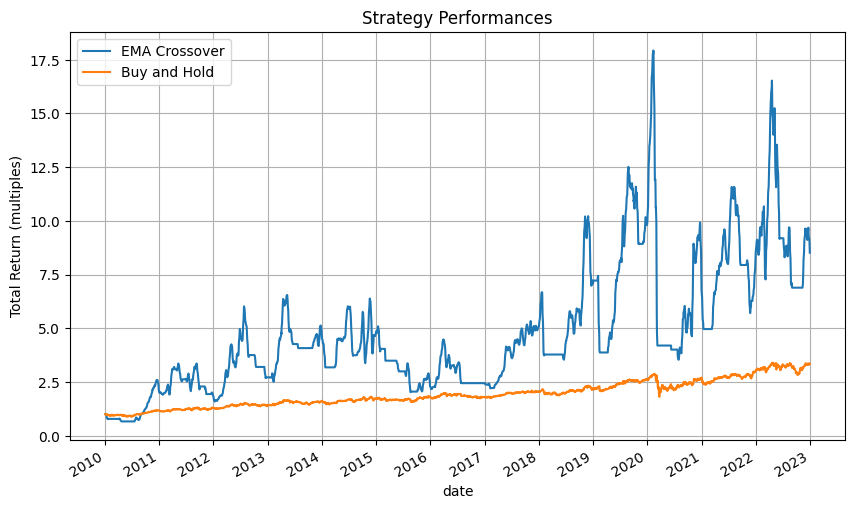

In [34]:
# visualize the performance of the strategy
ax = (strategy.loc[start_date:end_date].returns + 1).cumprod().plot(kind='line', label='EMA Crossover', title='Strategy Performances', ylabel='Total Return (multiples)', figsize=(10,6))
(np.exp(strategy.loc[start_date:end_date].log_return.cumsum())).plot(kind='line', label='Buy and Hold', grid=True, ax=ax)
ax.xaxis.set_major_locator(mdates.YearLocator())  # set ticks for each year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # format of the year label
plt.legend(loc='upper left');

### Strategy 2: EMA Crossover + RSI

Additional and RSI value below (above) 30 (70) is generally seen as oversold (overbought).

A moving from below 30 (above 70) to above (below) it is seen as a bullish (bearish indicator). We try to overlay these two indicators to improve performance.

In [35]:
# required indicators
strategy = data[DEFAULT_COLUMNS + 
    [
        'volume', 'log_return',
        'ema_5', 'ema_10','ema_21', 'ema_50',
        'rsi_7', 'rsi_9', 'rsi_10', 'rsi_14',
    ]
].dropna()

K = 7 # using the same K=7 as before
RSI_K = 14

# strategy idea
# by adding more indicators as a filters, we should expect lesser trades and perhaps less volatility than previous strategy
strategy['signal'] = (
    (strategy['ema_21'] > strategy['ema_50']) & 
    (strategy[f'rsi_{RSI_K}'] < 50)
).astype(np.int32)

strategy['target'] = strategy['log_return'].rolling(K).sum().shift(-K)
strategy.dropna(inplace=True)
strategy['log_returns'] = (strategy['signal'] * strategy['target'])
strategy['returns'] = np.exp(strategy.log_returns) - 1

In [36]:
strategy

,open,high,low,close,volume,log_return,ema_5,ema_10,ema_21,ema_50,rsi_7,rsi_9,rsi_10,rsi_14,signal,target,log_returns,returns
date,,,,,,,,,,,,,,,,,,
2000-03-14 00:00:00+00:00,11.001264,11.142709,10.781239,10.891252,11162000.0,-0.010050,11.314485,11.712073,12.369498,13.882521,17.555036,20.357958,21.477160,24.926740,0,0.081706,0.0,0.0
2000-03-15 00:00:00+00:00,10.938400,12.022810,10.938400,11.959946,22138200.0,0.093603,11.529639,11.757141,12.332266,13.807126,50.950664,47.034070,45.683490,42.582806,0,-0.011897,-0.0,0.0
2000-03-16 00:00:00+00:00,12.211401,12.541439,12.211401,12.510007,17610200.0,0.044966,11.856428,11.894025,12.348424,13.756259,60.547079,55.638076,53.824204,49.204595,0,-0.094808,-0.0,0.0
2000-03-17 00:00:00+00:00,12.510005,12.557153,12.258548,12.352844,14530800.0,-0.012643,12.021900,11.977447,12.348826,13.701223,56.840134,52.877100,51.379553,47.518361,0,-0.090487,-0.0,0.0
2000-03-20 00:00:00+00:00,12.321415,12.321415,12.085673,12.211402,6755200.0,-0.011516,12.085067,12.019984,12.336333,13.642798,53.406948,50.347506,49.147385,45.990803,0,-0.035367,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-15 00:00:00+00:00,63.355658,63.504635,62.918652,62.978245,8207500.0,-0.004563,62.881610,62.839992,62.720492,62.091749,53.824540,53.678027,53.728758,54.227232,0,0.037150,0.0,0.0
2024-07-16 00:00:00+00:00,62.998109,63.872115,62.958381,63.832386,9025100.0,0.013471,63.198535,63.020427,62.821573,62.160009,67.275350,64.718511,63.848753,61.780517,0,0.027622,0.0,0.0
2024-07-17 00:00:00+00:00,64.031032,64.944766,63.971443,64.765991,12508200.0,0.014520,63.721020,63.337803,62.998339,62.262204,76.138904,72.715167,71.435930,67.996914,0,0.027826,0.0,0.0


In [37]:
# print the performance statistic of the strategy and the buy-and-hold
start_date = '2010-01-01'
end_date = '2022-12-31'
metric_utils.benchmark_performance(data, start_date, end_date)
metric_utils.strategy_peformance(strategy.loc[start_date:end_date])

======================= BENCHMARK BUY-N-HOLD PERFORMANCE =======================
Trading Days: 3271
'Up' days: 1723 (52.68%)
'Down' days: 1514 (46.29%)
Total Return: 233.36%
Annualised Volatility: 17.55%
Maximum Drawdown: -36.99%
Profit Factor: 1.103
Average Profit: 0.008
Average Loss: 0.008
Benchmark performance dict = {'trade_days': '3271', 'up_days': '1723', 'up_days_percentage': '52.68', 'down_days': '1514', 'down_days_percentage': '46.29', 'total_return': '233.36', 'annualised_volatility': '17.55', 'maximum_drawdown': '-36.99', 'profit_factor': '1.103', 'average_profit': '0.008', 'average_loss_display': '0.008'}
=========================== STRATEGY PERFORMANCE ===========================
Trades: 482
'Up' days: 285 (59.13%)
'Down' days: 195 (40.46%)
Total Return: 296.87%
Annualised Volatility: 18.36%
Maximum Drawdown: -58.56%
Profit Factor: 1.303
Average Profit: 0.021
Average Loss: 0.023
Strategy performance dict = {'trades': '482', 'up_days': '285', 'up_days_percentage': '59.13', 

{'trades': '482',
 'up_days': '285',
 'up_days_percentage': '59.13',
 'down_days': '195',
 'down_days_percentage': '40.46',
 'total_return': '296.87',
 'annualised_volatility': '18.36',
 'maximum_drawdown': '-58.56',
 'profit_factor': '1.303',
 'average_profit': '0.021',
 'average_loss_display': '0.023'}

In [38]:
###

metric_utils.visualise_pricechart(strategy, start=start_date, end=end_date, indicators=['EMA'], signal_marker=True)

<!-- Notice that the volatility and maximum drawndown is much lesser now, which is desirable.

But as this signal occurs rarely, the number of trades decreases a lot as well. 

Nonetheless, this strategy can be a great addition to an arsenal of strategies. -->

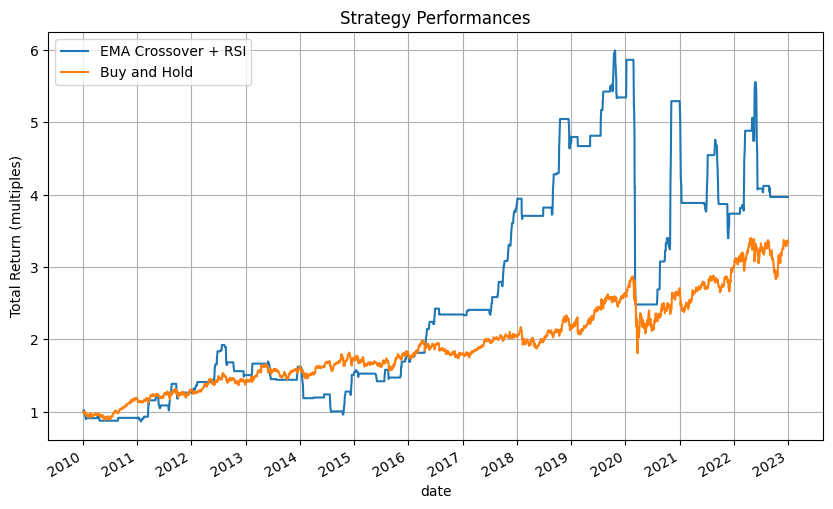

In [39]:
# visualize the performance of the strategy
ax = (strategy.loc[start_date:end_date].returns + 1).cumprod().plot(kind='line', label='EMA Crossover + RSI', title='Strategy Performances', ylabel='Total Return (multiples)', figsize=(10,6))
(np.exp(strategy.loc[start_date:end_date].log_return.cumsum())).plot(kind='line', label='Buy and Hold', grid=True, ax=ax)
ax.xaxis.set_major_locator(mdates.YearLocator())  # set ticks for each year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # format of the year label
plt.legend(loc='upper left');

### Strategy 3: RSI + ADX

In [40]:
# required indicators
strategy = data[DEFAULT_COLUMNS + 
    [
        'volume', 'log_return',
        'rsi_7', 'rsi_9', 'rsi_10', 'rsi_14',
        'adx_3', 'adx_5', 'adx_7', 'adx_14',

    ]
].dropna()

K = 7 # using the same K=7 as before
RSI_K = 14
ADX_K = 14

# strategy idea
# by adding more indicators as a filters, we should expect lesser trades and perhaps less volatility
strategy['signal'] = (
    (strategy[f'rsi_{RSI_K}'] < 45) &
    (strategy[f'adx_{ADX_K}'] > 30)
).astype(np.int32)

strategy['target'] = strategy['log_return'].rolling(K).sum().shift(-K)
strategy.dropna(inplace=True)
strategy['log_returns'] = (strategy['signal'] * strategy['target'])
strategy['returns'] = np.exp(strategy.log_returns) - 1

In [41]:
# print the performance statistic of the strategy and the buy-and-hold
start_date = '2010-01-01'
end_date = '2022-12-31'
metric_utils.benchmark_performance(data, start_date, end_date)
metric_utils.strategy_peformance(strategy.loc[start_date:end_date])

======================= BENCHMARK BUY-N-HOLD PERFORMANCE =======================
Trading Days: 3271
'Up' days: 1723 (52.68%)
'Down' days: 1514 (46.29%)
Total Return: 233.36%
Annualised Volatility: 17.55%
Maximum Drawdown: -36.99%
Profit Factor: 1.103
Average Profit: 0.008
Average Loss: 0.008
Benchmark performance dict = {'trade_days': '3271', 'up_days': '1723', 'up_days_percentage': '52.68', 'down_days': '1514', 'down_days_percentage': '46.29', 'total_return': '233.36', 'annualised_volatility': '17.55', 'maximum_drawdown': '-36.99', 'profit_factor': '1.103', 'average_profit': '0.008', 'average_loss_display': '0.008'}
=========================== STRATEGY PERFORMANCE ===========================
Trades: 166
'Up' days: 115 (69.28%)
'Down' days: 51 (30.72%)
Total Return: 247.02%
Annualised Volatility: 19.55%
Maximum Drawdown: -83.50%
Profit Factor: 1.537
Average Profit: 0.031
Average Loss: 0.045
Strategy performance dict = {'trades': '166', 'up_days': '115', 'up_days_percentage': '69.28', '

{'trades': '166',
 'up_days': '115',
 'up_days_percentage': '69.28',
 'down_days': '51',
 'down_days_percentage': '30.72',
 'total_return': '247.02',
 'annualised_volatility': '19.55',
 'maximum_drawdown': '-83.50',
 'profit_factor': '1.537',
 'average_profit': '0.031',
 'average_loss_display': '0.045'}

In [42]:
metric_utils.visualise_pricechart(strategy, start=start_date, end=end_date, indicators=[], signal_marker=True)

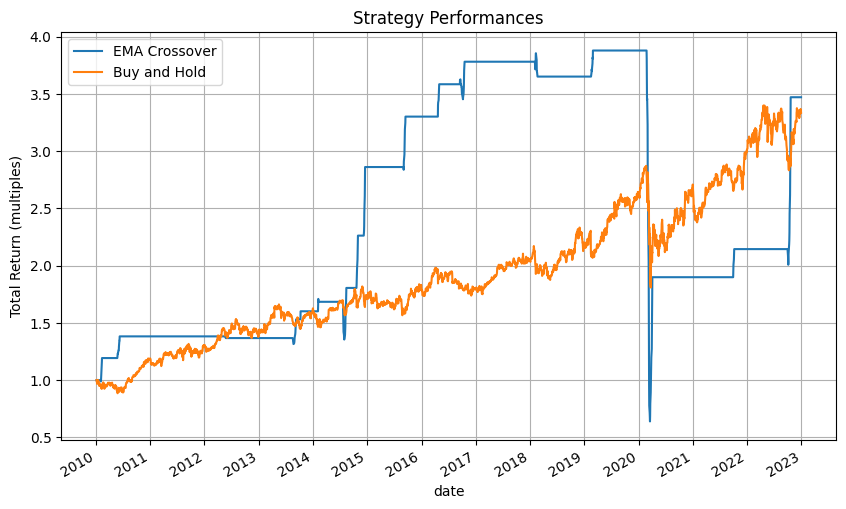

In [43]:
# visualize the performance of the strategy
ax = (strategy.loc[start_date:end_date].returns + 1).cumprod().plot(kind='line', label='EMA Crossover', title='Strategy Performances', ylabel='Total Return (multiples)', figsize=(10,6))
(np.exp(strategy.loc[start_date:end_date].log_return.cumsum())).plot(kind='line', label='Buy and Hold', grid=True, ax=ax)
ax.xaxis.set_major_locator(mdates.YearLocator())  # set ticks for each year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # format of the year label
plt.legend(loc='upper left');

### Strategy 4: Machine Learning + Technical Indicators

Improvement of Strategy 1. The signal EMA(21) > EMA(50) will be the condition for the model to be applied as a filter.
The model learns the validity of the signal from other technical indicator and features such as normalised volumes, bollinger bands, distance between prices from the bounds of the bollinger bands etc.

In [44]:
from sklearn.ensemble import RandomForestClassifier # Allows us to backtest and predict market behavior (such as future stock price movements) based on historical features like price trends, volume, technical indicators (SMA, RSI), or other financial metrics.
from sklearn.metrics import accuracy_score, f1_score # Evaluate the performance of the RandomForestClassifier

In [45]:
# create features (independent variables) and target (dependent variable)
strategy = data[DEFAULT_COLUMNS +
    [ 
        'log_return',
        'ema_5', 'ema_10', 'ema_21','ema_50',
        'rsi_14',
        'adx_14',
        'norm_volume_5','norm_volume_10','norm_volume_21',
        'bb_5_lb', 'bb_5_ub', 'bb_5_mb', 'bb_5_bw', 'bb_5_p'
    ]
].dropna()

strategy['x1'] = strategy['bb_5_ub'] - strategy['close']
strategy['x2'] = strategy['close'] - strategy['bb_5_mb']
strategy['x3'] = strategy['close'] - strategy['bb_5_lb'] 
strategy['x4'] = strategy['close'] - strategy['ema_10']
strategy['x5'] = strategy['ema_10'] - strategy['ema_21']
strategy['x6'] = strategy['ema_21'] - strategy['ema_50']

# create target variable to predict - idea is that since the default strategy would not be 100% accurate
# we will use the machine learning model to learn and filter out the signals using information from other indicators
K = 7 # using the same K=7 as before
RSI_K = 14

strategy['signal'] = (
    strategy['ema_21'] > strategy['ema_50']
).astype(np.int32)
strategy['returns'] = np.exp(strategy['signal'] * strategy['log_return'].rolling(K).sum().shift(-K)) - 1
strategy.dropna(inplace=True)

dataset = strategy[strategy.signal == 1].copy()
dataset['target'] = (dataset.returns > 0).astype(np.int32)

# train-test split
TRAIN_END = '2022-12-31' # define last period of training date
TEST_PERIOD_WEEKS = 52
TEST_START = str((pd.to_datetime(TRAIN_END) + pd.Timedelta(value=TEST_PERIOD_WEEKS, unit='W')).date())
train = dataset.loc[:TRAIN_END]
test = dataset.loc[TEST_START:]

# train the model 
FEATURES = ['rsi_14', 'adx_14', 'bb_5_bw', 'bb_5_p','norm_volume_5', 'norm_volume_10','x1', 'x2', 'x3', 'x4', 'x5', 'x6']
train_X, train_y = train[FEATURES], train['target']
model = RandomForestClassifier() # instantiate the model 
model.fit(train_X, train_y) # this api call trains the model

RandomForestClassifier()

In [46]:
# evaluate the model accuracy
test_X, test_y = test[FEATURES], test['target']
y_pred = model.predict(test_X)
acc = accuracy_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

print(f"Model Accuracy: {acc*100:.2f}%")
# print(f"Model F1-Score: {f1:.2f}")

Model Accuracy: 62.88%


In [47]:
# without using model
out_of_sample_without_model = strategy[strategy.signal == 1].loc[TEST_START:]
metric_utils.strategy_peformance(out_of_sample_without_model)

=========================== STRATEGY PERFORMANCE ===========================
Trades: 132
'Up' days: 73 (55.30%)
'Down' days: 59 (44.70%)
Total Return: 69.77%
Annualised Volatility: 29.40%
Maximum Drawdown: -22.24%
Profit Factor: 1.669
Average Profit: 0.018
Average Loss: 0.013
Strategy performance dict = {'trades': '132', 'up_days': '73', 'up_days_percentage': '55.30', 'down_days': '59', 'down_days_percentage': '44.70', 'total_return': '69.77', 'annualised_volatility': '29.40', 'maximum_drawdown': '-22.24', 'profit_factor': '1.669', 'average_profit': '0.018', 'average_loss_display': '0.013'}


{'trades': '132',
 'up_days': '73',
 'up_days_percentage': '55.30',
 'down_days': '59',
 'down_days_percentage': '44.70',
 'total_return': '69.77',
 'annualised_volatility': '29.40',
 'maximum_drawdown': '-22.24',
 'profit_factor': '1.669',
 'average_profit': '0.018',
 'average_loss_display': '0.013'}

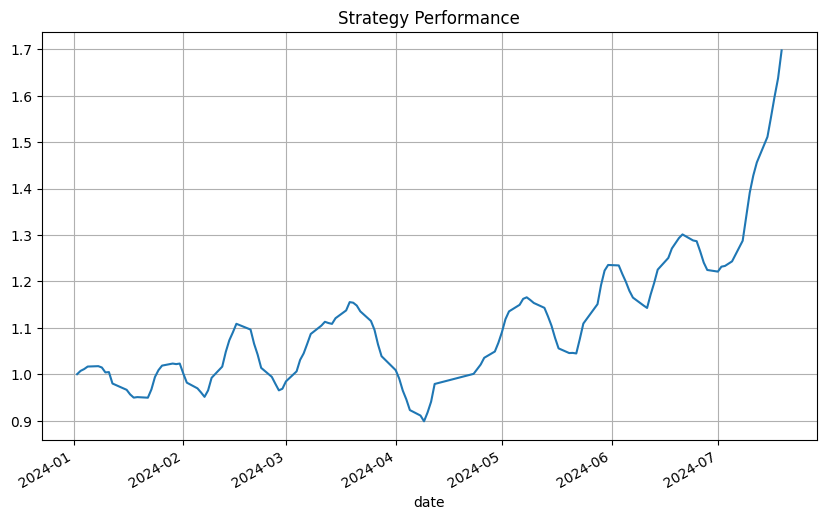

In [48]:
# visualize the performance of the strategy without using model
(out_of_sample_without_model.returns + 1).cumprod().plot(kind='line', grid=True, title='Strategy Performance', figsize=(10,6));

In [52]:
# strategy performance using the model
# notice the large decrease in maximum drawdown, the model was able to filter our drastic false signals
# winning rate has also improved a lot
out_of_sample_with_model = strategy[strategy.signal == 1].loc[TEST_START:].copy()
out_of_sample_with_model['signal'] = y_pred
out_of_sample_with_model = out_of_sample_with_model[out_of_sample_with_model.signal == 1]
metric_utils.strategy_peformance(out_of_sample_with_model)

=========================== STRATEGY PERFORMANCE ===========================
Trades: 72
'Up' days: 48 (66.67%)
'Down' days: 24 (33.33%)
Total Return: 67.00%
Annualised Volatility: 27.22%
Maximum Drawdown: -13.42%
Profit Factor: 2.701
Average Profit: 0.017
Average Loss: 0.013
Strategy performance dict = {'trades': '72', 'up_days': '48', 'up_days_percentage': '66.67', 'down_days': '24', 'down_days_percentage': '33.33', 'total_return': '67.00', 'annualised_volatility': '27.22', 'maximum_drawdown': '-13.42', 'profit_factor': '2.701', 'average_profit': '0.017', 'average_loss_display': '0.013'}


{'trades': '72',
 'up_days': '48',
 'up_days_percentage': '66.67',
 'down_days': '24',
 'down_days_percentage': '33.33',
 'total_return': '67.00',
 'annualised_volatility': '27.22',
 'maximum_drawdown': '-13.42',
 'profit_factor': '2.701',
 'average_profit': '0.017',
 'average_loss_display': '0.013'}

In [86]:
# utils.benchmark_performance(spy, '2024-01-01', '2024-07-20') # and we kind of beat the index as well

In [53]:
strategy['signal'] = 0
for datetime in out_of_sample_with_model.index:
    strategy.at[datetime, 'signal'] = 1

In [49]:
metric_utils.visualise_pricechart(strategy, start=str(test.index[0].date()), end=str(test.index[-1].date()), indicators=[], signal_marker=True)

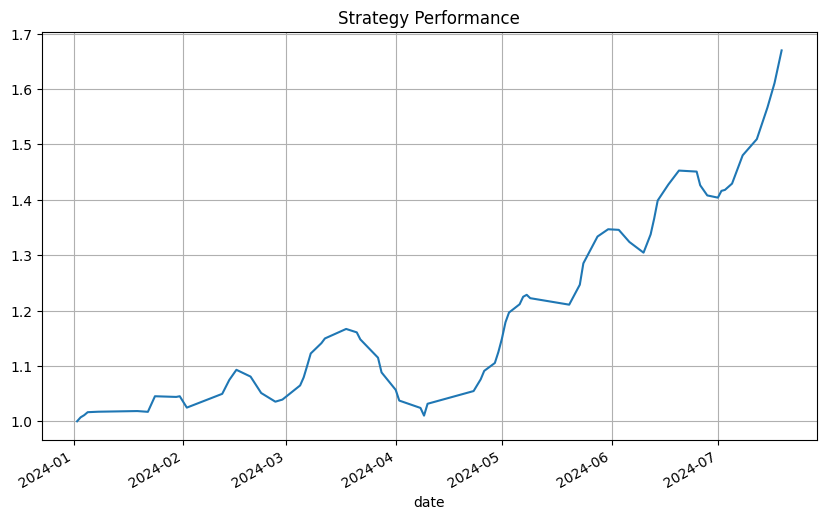

In [54]:
# visualize the performance of the strategy using model - notice the fewer sharp drops throughout the period
(out_of_sample_with_model.returns + 1).cumprod().plot(kind='line', grid=True, title='Strategy Performance', figsize=(10,6));

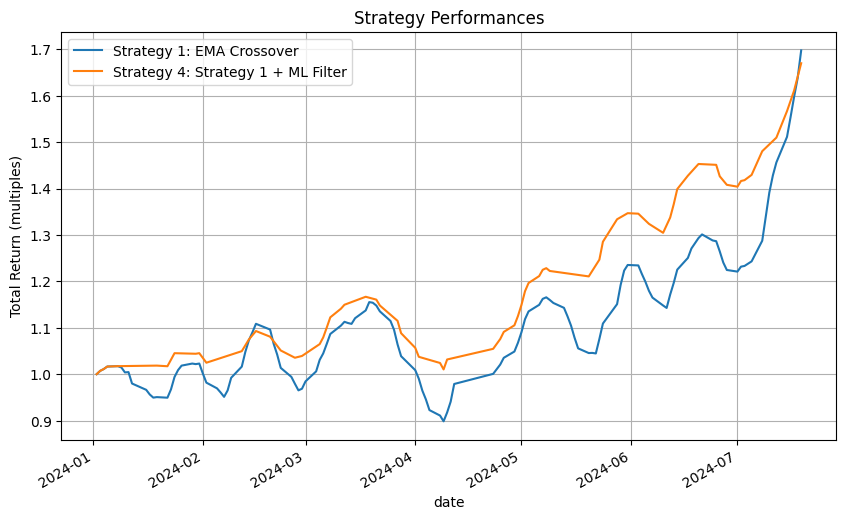

In [55]:
ax = (out_of_sample_without_model.returns + 1).cumprod().plot(kind='line', label='Strategy 1: EMA Crossover', title='Strategy Performances', ylabel='Total Return (multiples)', figsize=(10,6))
(out_of_sample_with_model.returns + 1).cumprod().plot(kind='line', label='Strategy 4: Strategy 1 + ML Filter', grid=True, ax=ax)
# ax.xaxis.set_major_locator(mdates.YearLocator())  # set ticks for each year
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # format of the year label
plt.legend(loc='upper left');

### Simple Price Chart Visualisation

In [175]:
# # TO BE REFINED LATER ON IF NEED BE:

# # Create subplots: 2 rows, 1 column with shared x-axis
# fig = make_subplots(
#     rows=2, cols=1,
#     shared_xaxes=True,
#     vertical_spacing=0.1,
#     row_heights=[0.7, 0.3],  # Relative heights of the subplots
#     subplot_titles=[f'Candlestick with SMA for {TICKER}', 'RSI and ADX']
# )

# # Add candlestick trace to the first row
# fig.add_trace(
#     go.Candlestick(
#         x=data.index,
#         open=data['open'],
#         high=data['high'],
#         low=data['low'],
#         close=data['close'],
#         name='Candlestick'
#     ),
#     row=1, col=1
# )

# # Add moving average trace to the first row
# fig.add_trace(
#     go.Scatter(
#         x=data.index,
#         y=data['sma_10'],
#         mode='lines',
#         name='SMA(10)',
#         line=dict(color='green', width=1)
#     ),
#     row=1, col=1
# )
# fig.add_trace(
#     go.Scatter(
#         x=data.index,
#         y=data['sma_21'],
#         mode='lines',
#         name='SMA(21)',
#         line=dict(color='blue', width=1)
#     ),
#     row=1, col=1
# )

# # Add RSI trace to the second row
# fig.add_trace(
#     go.Scatter(
#         x=data.index,
#         y=data['rsi_7'],
#         mode='lines',
#         name='RSI 7',
#         line=dict(color='purple', width=2)
#     ),
#     row=2, col=1
# )

# # # Add ADX trace to the second row
# fig.add_trace(
#     go.Scatter(
#         x=data.index,
#         y=data['adx_14'],
#         mode='lines',
#         name='ADX 14',
#         line=dict(color='green', width=2)
#     ),
#     row=2, col=1
# )

# # Update layout for the subplots
# fig.update_layout(
#     title=f'OHLC with SMA and Indicators for {TICKER}',
#     xaxis2_title='Date',  # Title for the second subplot's x-axis
#     yaxis=dict(title='OHLC'),
#     width=1200,
#     height=800,
#     yaxis2=dict(title='RSI & ADX (0-100)', range=[0, 100]),  # Set the y-axis range for RSI and ADX
#     xaxis_rangeslider_visible=False,  # Hide range slider
#     legend=dict(x=0.01, y=0.99)
# )
# fig.show()